# FWI Data Inventory

This script directly reads from GitHub's repo joint-evaluation [catalog.csv](https://github.com/euro-cordex/joint-evaluation/blob/main/catalog.csv) and yields an overview of available hourly variables for FWI calculation

***
Note: to obtain the same results, just use the helper `availableModels(do.plot=TRUE)`
***

character(0)

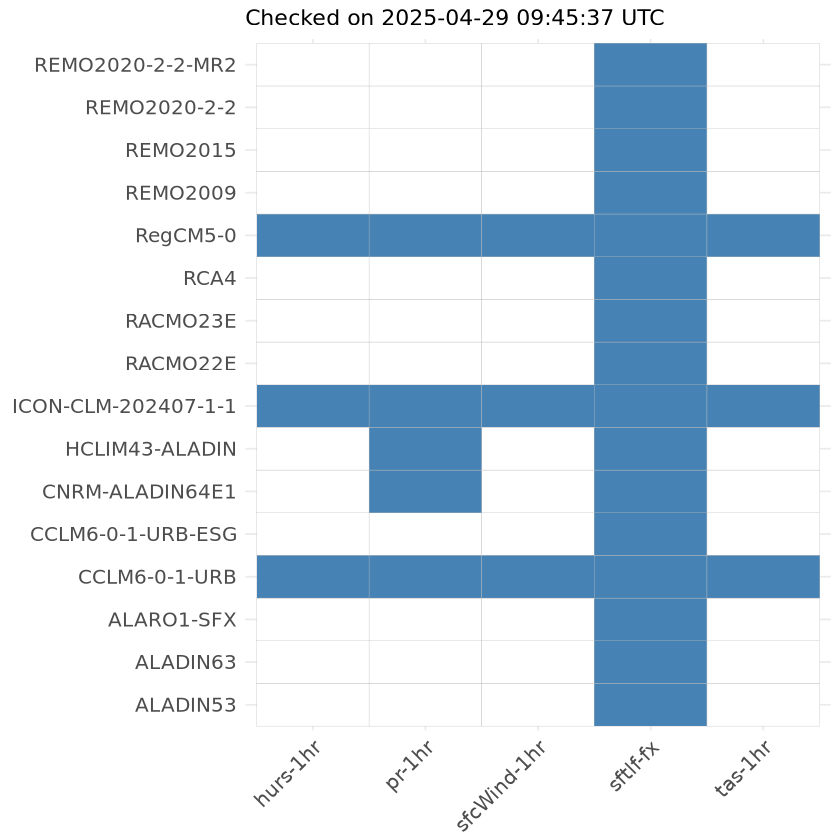

In [30]:
source("../R/helpers.R")
availableModels(do.plot=TRUE)

***
### Test area
***

In [3]:
require(magrittr)
require(dplyr)

In [4]:
url <- "https://raw.githubusercontent.com/euro-cordex/joint-evaluation/refs/heads/main/catalog.csv"
data <- read.csv(url)

In [5]:
hourly.fwi <- subset(data,
                     subset = frequency %in% c("1hr","fx") & variable_id %in% c("hurs", "tas", "sfcWind", "pr", "sftlf"))

In [6]:
# Grouped summary
hf <- hourly.fwi %>% group_by(institution_id, driving_source_id, driving_experiment_id, source_id) 

In [7]:
ids <- c("project_id", "mip_era", "activity_id", "domain_id", "institution_id",
         "driving_source_id", "driving_experiment_id", "driving_variant_label",
         "source_id", "version_realization", "frequency", "variable_id")

In [8]:
## Unique rows (skip file path and variable version info)
hf1 <- dplyr::distinct(hf, !!!syms(ids)) %>% as.data.frame()

In [9]:
str(hf1)
## Save data inventory as csv (uncomment if needed)
# write.csv(hf1,
#           file = paste0("fwi_vars_1h_eval_", Sys.Date(), ".csv"),
#           row.names = FALSE)

'data.frame':	51 obs. of  12 variables:
 $ project_id           : chr  "CORDEX" "CORDEX" "CORDEX" "CORDEX" ...
 $ mip_era              : chr  "CMIP5" "CMIP5" "CMIP5" "CMIP5" ...
 $ activity_id          : chr  "output" "output" "output" "output" ...
 $ domain_id            : chr  "EUR-11" "EUR-11" "EUR-11" "EUR-11" ...
 $ institution_id       : chr  "CNRM" "CNRM" "SMHI" "KNMI" ...
 $ driving_source_id    : chr  "ERAINT" "ERAINT" "ERAINT" "ERAINT" ...
 $ driving_experiment_id: chr  "evaluation" "evaluation" "evaluation" "evaluation" ...
 $ driving_variant_label: chr  "r1i1p1" "r1i1p1" "r0i0p0" "r1i1p1" ...
 $ source_id            : chr  "ALADIN53" "ALADIN63" "RCA4" "RACMO22E" ...
 $ version_realization  : chr  "v1" "v1" "v1" "v1" ...
 $ frequency            : chr  "fx" "fx" "fx" "fx" ...
 $ variable_id          : chr  "sftlf" "sftlf" "sftlf" "sftlf" ...


## Data availability Matrix

In [10]:
## Label vars as 'var_id-1hr'
hf1[["var_freq"]] <- paste(hf1$variable_id, hf1$frequency, sep = "-")

In [11]:
# Binary matrix
binary_matrix <- table(hf1$var_freq, hf1$source_id)

# matrix as data.frame (for plotting)
binary_df <- as.data.frame(as.table(binary_matrix))

In [12]:
binary_df

Var1,Var2,Freq
<fct>,<fct>,<int>
hurs-1hr,ALADIN53,0
pr-1hr,ALADIN53,0
sfcWind-1hr,ALADIN53,0
sftlf-fx,ALADIN53,1
tas-1hr,ALADIN53,0
hurs-1hr,ALADIN63,0
pr-1hr,ALADIN63,0
sfcWind-1hr,ALADIN63,0
sftlf-fx,ALADIN63,1


In [21]:
unique(binary_df$Freq)

[1]  0  1 22

In [22]:
## Handle exceptions
binary_df$Freq <- ifelse(is.na(binary_df$Freq), 0, binary_df$Freq)
binary_df$Freq <- ifelse(binary_df$Freq > 1, 1, binary_df$Freq)


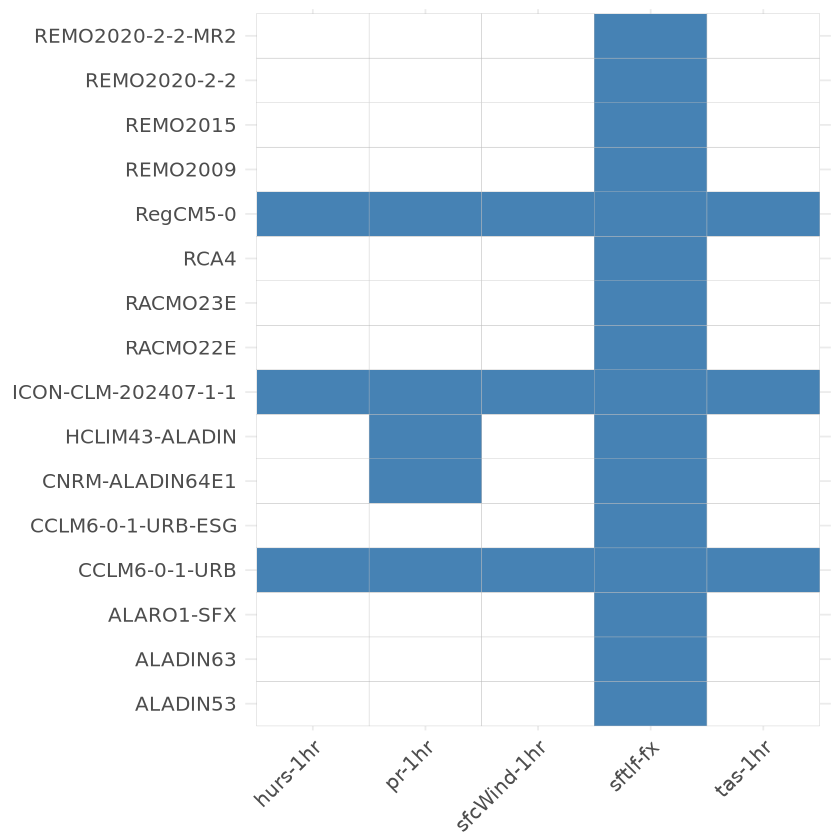

In [27]:
## Plotting
require(ggplot2)

ggplot2::ggplot(binary_df, aes(Var1, Var2)) +
    geom_tile(aes(fill = factor(Freq)), color = "grey", size = .1) +
    scale_fill_manual(values = c("0" = "white", "1" = "#4682b4"), guide = "none") +
    labs(x = NULL, y = NULL, fill = "Frequency") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
          axis.text.y = element_text(size = 12))

## Vector of complete available model names

In [22]:
which(colSums(binary_matrix) == 4L) %>% names()

character(0)